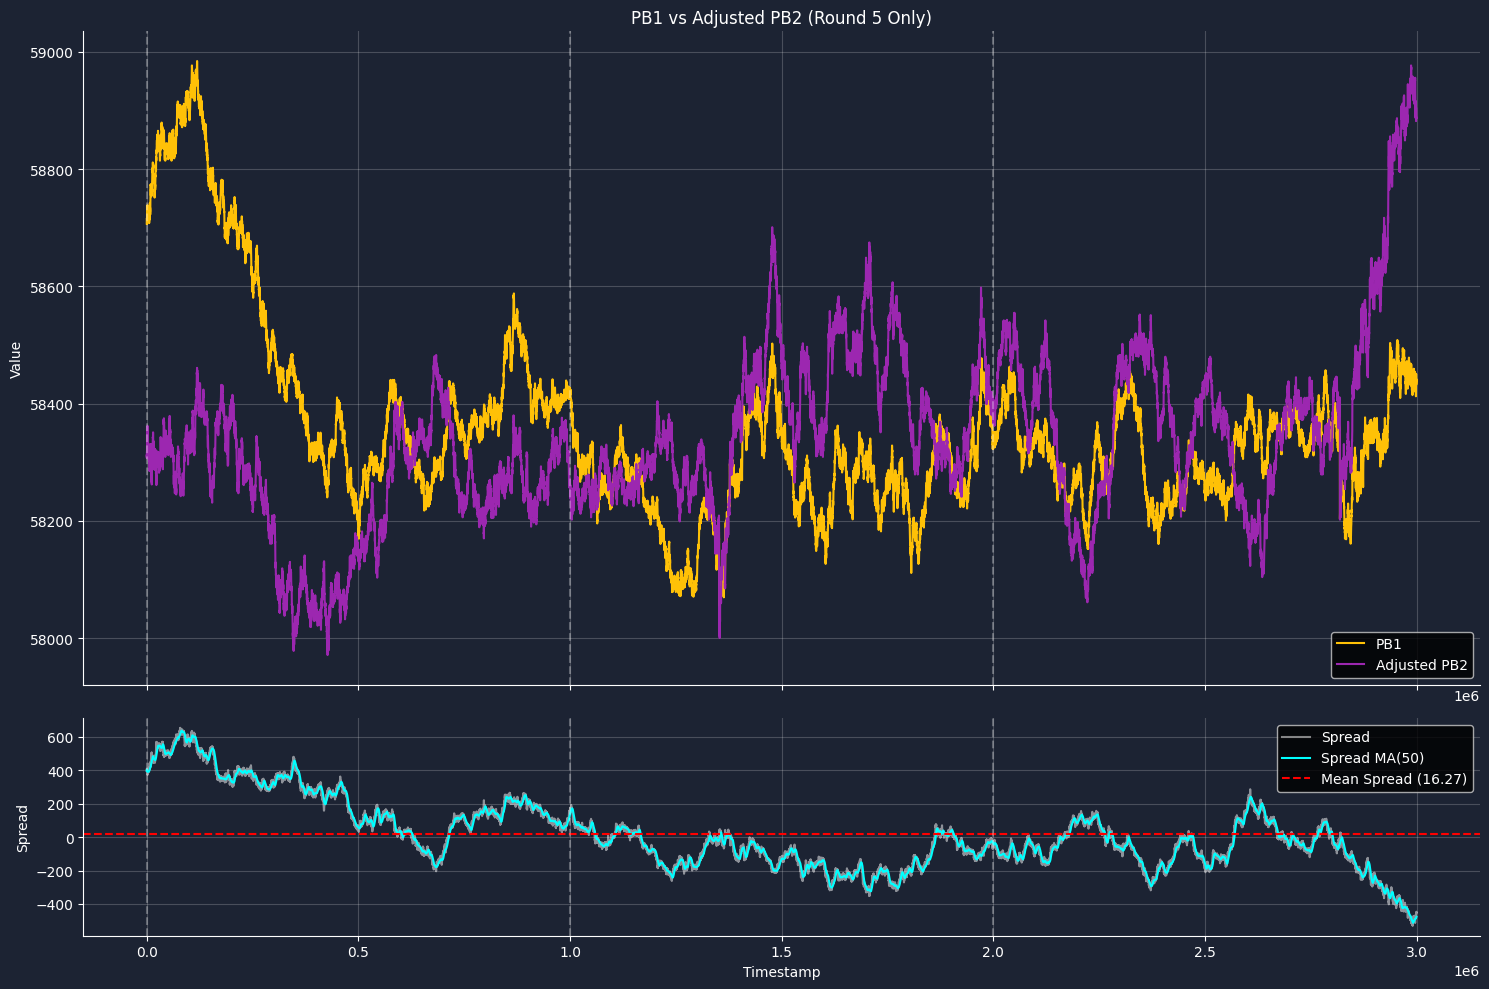

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Configuration ---
PRODUCT1 = "PICNIC_BASKET1"
PRODUCT2 = "PICNIC_BASKET2"
products_needed = [PRODUCT1, PRODUCT2]

PRODUCT1_WEIGHT = 1.0
PRODUCT1_OFFSET = 0.0
PRODUCT2_WEIGHT = 2.0
PRODUCT2_OFFSET = -1869.0

# Absolute file paths
file_paths = {
    2: ("C:/Users/sammy/Desktop/prosperity-main/rd5/data/prices_round_5_day_2.csv", 0),
    3: ("C:/Users/sammy/Desktop/prosperity-main/rd5/data/prices_round_5_day_3.csv", 1_000_000),
    4: ("C:/Users/sammy/Desktop/prosperity-main/rd5/data/prices_round_5_day_4.csv", 2_000_000),
}
day_separators = [0, 1_000_000, 2_000_000]

# Plot styling
plt.style.use('dark_background')
FIG_BG_COLOR = '#1C2333'; AX_BG_COLOR = '#1C2333'; GRID_COLOR = 'white'
SPINE_COLOR = '#ffffff'; TICK_COLOR = 'white'; TEXT_COLOR = 'white'
SPREAD_MA_WINDOW = 50
COMBO1_COLOR = '#FFC107'
COMBO2_COLOR = '#9C27B0'
SPREAD_COLOR = 'white'
SPREAD_MA_COLOR = 'cyan'

def load_and_clean_data_generic(file_path, day_offset):
    try:
        df = pd.read_csv(file_path, sep=';')
        df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')
        df.dropna(subset=['timestamp'], inplace=True)
        df['timestamp'] = df['timestamp'].astype(int) + day_offset
        df['mid_price'] = pd.to_numeric(df['mid_price'], errors='coerce')
        df = df[['timestamp', 'product', 'mid_price']].copy()
        df.dropna(subset=['mid_price'], inplace=True)
        return df
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

def plot_basket_comparison(df, day_seps):
    pivot_df = df.pivot(index='timestamp', columns='product', values='mid_price')
    if not all(p in pivot_df.columns for p in products_needed):
        print("Error: Missing product data.")
        return

    pivot_df['combo1'] = PRODUCT1_WEIGHT * pivot_df[PRODUCT1] + PRODUCT1_OFFSET
    pivot_df['combo2'] = PRODUCT2_WEIGHT * pivot_df[PRODUCT2] + PRODUCT2_OFFSET
    pivot_df['spread'] = pivot_df['combo1'] - pivot_df['combo2']
    pivot_df['spread_ma'] = pivot_df['spread'].rolling(window=SPREAD_MA_WINDOW, min_periods=1).mean()
    plot_data = pivot_df.dropna()

    mean_spread_val = plot_data['spread'].mean()

    fig = plt.figure(figsize=(15, 10), facecolor=FIG_BG_COLOR)
    gs = fig.add_gridspec(2, 1, height_ratios=[3, 1])
    ax1 = fig.add_subplot(gs[0], facecolor=AX_BG_COLOR)
    ax2 = fig.add_subplot(gs[1], facecolor=AX_BG_COLOR, sharex=ax1)

    ax1.plot(plot_data.index, plot_data['combo1'], label="PB1", color=COMBO1_COLOR)
    ax1.plot(plot_data.index, plot_data['combo2'], label="Adjusted PB2", color=COMBO2_COLOR)

    ax2.plot(plot_data.index, plot_data['spread'], label="Spread", color=SPREAD_COLOR, alpha=0.5)
    ax2.plot(plot_data.index, plot_data['spread_ma'], label=f"Spread MA({SPREAD_MA_WINDOW})", color=SPREAD_MA_COLOR)
    ax2.axhline(mean_spread_val, linestyle='--', color='red', label=f"Mean Spread ({mean_spread_val:.2f})")

    for ax in [ax1, ax2]:
        for sep in day_seps:
            ax.axvline(sep, color='white', linestyle='--', alpha=0.3)
        ax.grid(True, alpha=0.2, color=GRID_COLOR)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color(SPINE_COLOR)
        ax.spines['bottom'].set_color(SPINE_COLOR)
        ax.tick_params(axis='x', colors=TICK_COLOR)
        ax.tick_params(axis='y', colors=TICK_COLOR)
        ax.legend()

    ax1.set_title("PB1 vs Adjusted PB2 (Round 5 Only)", color=TEXT_COLOR)
    ax1.set_ylabel("Value")
    ax2.set_xlabel("Timestamp")
    ax2.set_ylabel("Spread")
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.tight_layout()
    plt.show()

# --- Load and Plot ---
all_data_r5 = []
for day, (path, offset) in file_paths.items():
    df = load_and_clean_data_generic(path, offset)
    if df is not None:
        all_data_r5.append(df[df["product"].isin(products_needed)])

if all_data_r5:
    combined_df = pd.concat(all_data_r5).sort_values("timestamp")
    plot_basket_comparison(combined_df, day_separators)
else:
    print("❌ No valid R5 data loaded.")


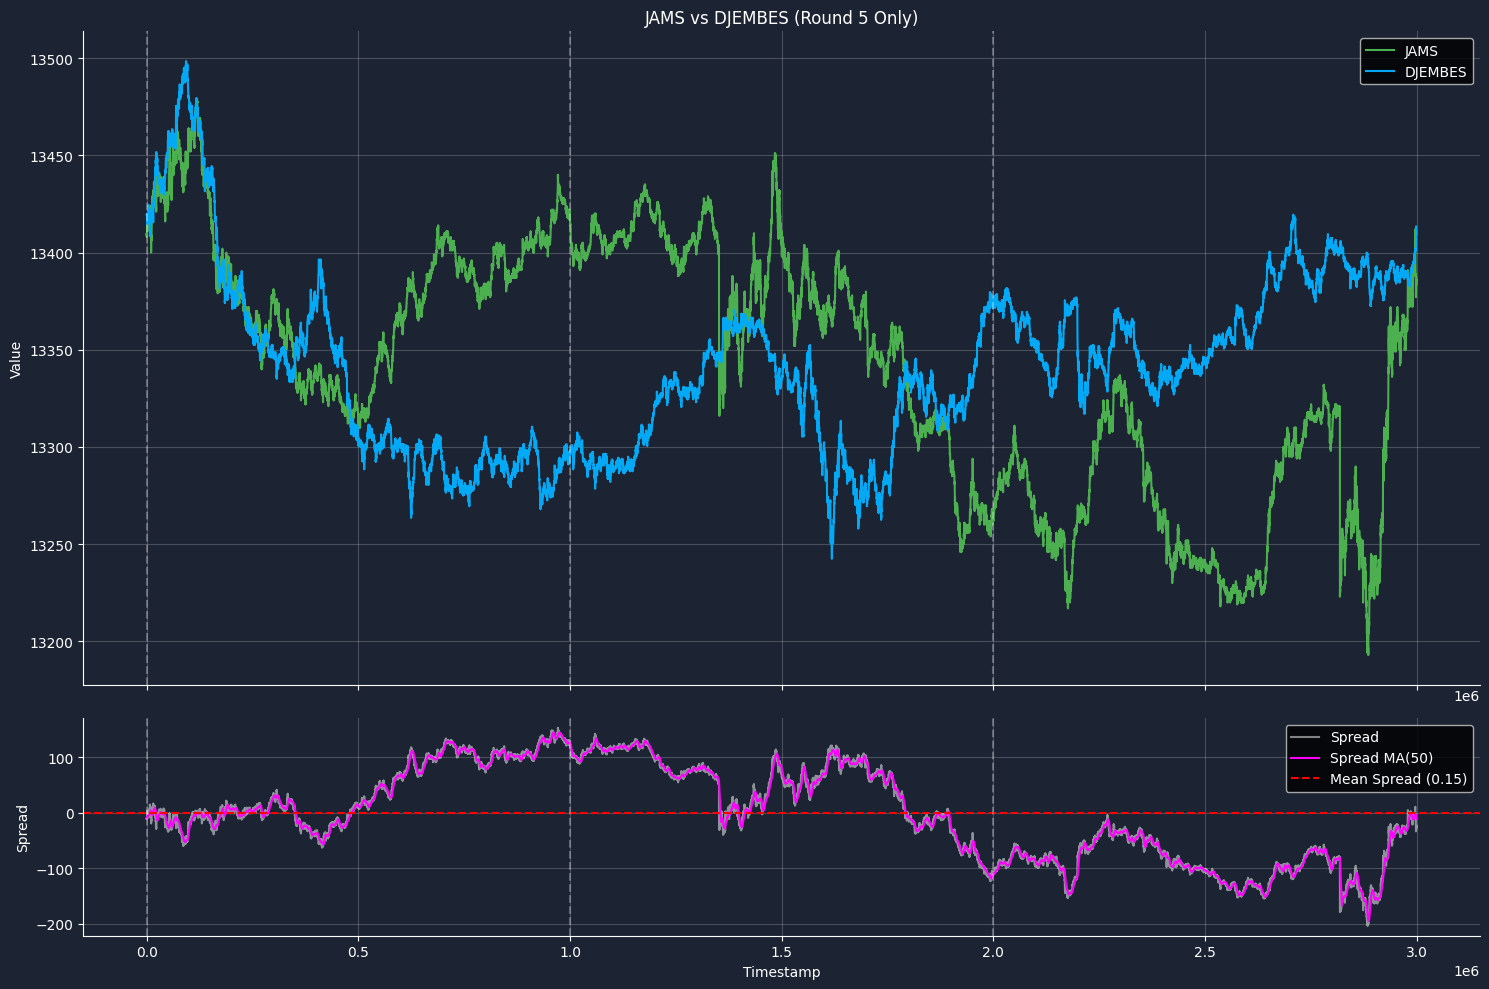

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Configuration ---
PRODUCT1 = "JAMS"
PRODUCT2 = "DJEMBES"
products_needed = [PRODUCT1, PRODUCT2]

PRODUCT1_WEIGHT = 2.0
PRODUCT1_OFFSET = +370
PRODUCT2_WEIGHT = 1.0
PRODUCT2_OFFSET = 0.0  # Adjust if needed to normalize levels

# Absolute file paths
file_paths = {
    2: ("C:/Users/sammy/Desktop/prosperity-main/rd5/data/prices_round_5_day_2.csv", 0),
    3: ("C:/Users/sammy/Desktop/prosperity-main/rd5/data/prices_round_5_day_3.csv", 1_000_000),
    4: ("C:/Users/sammy/Desktop/prosperity-main/rd5/data/prices_round_5_day_4.csv", 2_000_000),
}
day_separators = [0, 1_000_000, 2_000_000]

# Plot styling
plt.style.use('dark_background')
FIG_BG_COLOR = '#1C2333'; AX_BG_COLOR = '#1C2333'; GRID_COLOR = 'white'
SPINE_COLOR = '#ffffff'; TICK_COLOR = 'white'; TEXT_COLOR = 'white'
SPREAD_MA_WINDOW = 50
COMBO1_COLOR = '#4CAF50'  # Green for JAMS
COMBO2_COLOR = '#03A9F4'  # Blue for DJEMBES
SPREAD_COLOR = 'white'
SPREAD_MA_COLOR = 'magenta'

def load_and_clean_data_generic(file_path, day_offset):
    try:
        df = pd.read_csv(file_path, sep=';')
        df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')
        df.dropna(subset=['timestamp'], inplace=True)
        df['timestamp'] = df['timestamp'].astype(int) + day_offset
        df['mid_price'] = pd.to_numeric(df['mid_price'], errors='coerce')
        df = df[['timestamp', 'product', 'mid_price']].copy()
        df.dropna(subset=['mid_price'], inplace=True)
        return df
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

def plot_basket_comparison(df, day_seps):
    pivot_df = df.pivot(index='timestamp', columns='product', values='mid_price')
    if not all(p in pivot_df.columns for p in products_needed):
        print("Error: Missing product data.")
        return

    pivot_df['combo1'] = PRODUCT1_WEIGHT * pivot_df[PRODUCT1] + PRODUCT1_OFFSET
    pivot_df['combo2'] = PRODUCT2_WEIGHT * pivot_df[PRODUCT2] + PRODUCT2_OFFSET
    pivot_df['spread'] = pivot_df['combo1'] - pivot_df['combo2']
    pivot_df['spread_ma'] = pivot_df['spread'].rolling(window=SPREAD_MA_WINDOW, min_periods=1).mean()
    plot_data = pivot_df.dropna()

    mean_spread_val = plot_data['spread'].mean()

    fig = plt.figure(figsize=(15, 10), facecolor=FIG_BG_COLOR)
    gs = fig.add_gridspec(2, 1, height_ratios=[3, 1])
    ax1 = fig.add_subplot(gs[0], facecolor=AX_BG_COLOR)
    ax2 = fig.add_subplot(gs[1], facecolor=AX_BG_COLOR, sharex=ax1)

    ax1.plot(plot_data.index, plot_data['combo1'], label=PRODUCT1, color=COMBO1_COLOR)
    ax1.plot(plot_data.index, plot_data['combo2'], label=PRODUCT2, color=COMBO2_COLOR)

    ax2.plot(plot_data.index, plot_data['spread'], label="Spread", color=SPREAD_COLOR, alpha=0.5)
    ax2.plot(plot_data.index, plot_data['spread_ma'], label=f"Spread MA({SPREAD_MA_WINDOW})", color=SPREAD_MA_COLOR)
    ax2.axhline(mean_spread_val, linestyle='--', color='red', label=f"Mean Spread ({mean_spread_val:.2f})")

    for ax in [ax1, ax2]:
        for sep in day_seps:
            ax.axvline(sep, color='white', linestyle='--', alpha=0.3)
        ax.grid(True, alpha=0.2, color=GRID_COLOR)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color(SPINE_COLOR)
        ax.spines['bottom'].set_color(SPINE_COLOR)
        ax.tick_params(axis='x', colors=TICK_COLOR)
        ax.tick_params(axis='y', colors=TICK_COLOR)
        ax.legend()

    ax1.set_title(f"{PRODUCT1} vs {PRODUCT2} (Round 5 Only)", color=TEXT_COLOR)
    ax1.set_ylabel("Value")
    ax2.set_xlabel("Timestamp")
    ax2.set_ylabel("Spread")
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.tight_layout()
    plt.show()

# --- Load and Plot ---
all_data_r5 = []
for day, (path, offset) in file_paths.items():
    df = load_and_clean_data_generic(path, offset)
    if df is not None:
        all_data_r5.append(df[df["product"].isin(products_needed)])

if all_data_r5:
    combined_df = pd.concat(all_data_r5).sort_values("timestamp")
    plot_basket_comparison(combined_df, day_separators)
else:
    print("❌ No valid R5 data loaded.")
